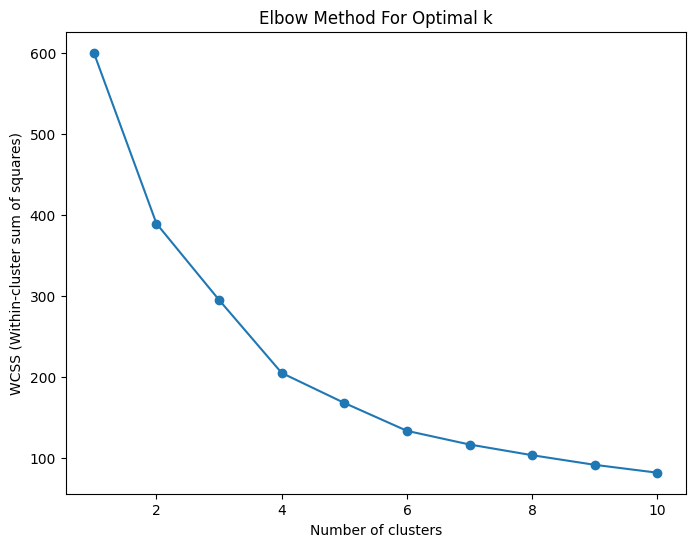

     CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0             1   19                  15                      39        4
1             2   21                  15                      81        4
2             3   20                  16                       6        3
3             4   23                  16                      77        4
4             5   31                  17                      40        4
..          ...  ...                 ...                     ...      ...
195         196   35                 120                      79        2
196         197   45                 126                      28        1
197         198   32                 126                      74        2
198         199   32                 137                      18        1
199         200   30                 137                      83        2

[200 rows x 5 columns]


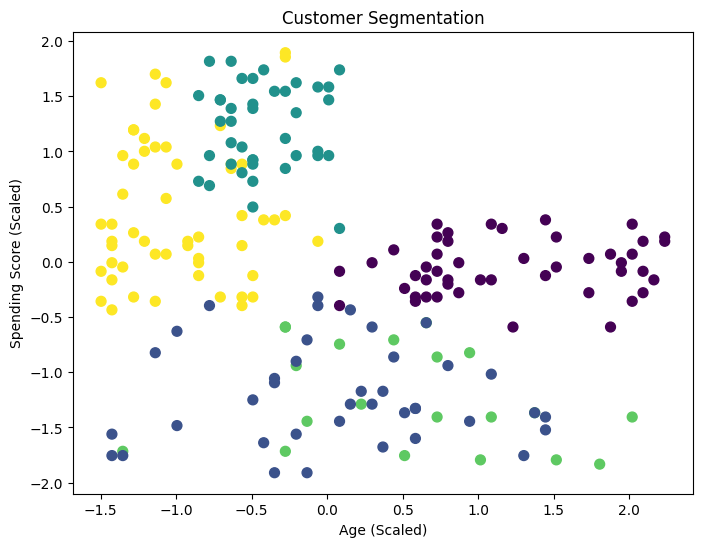

Silhouette Score: 0.41664341513732767
Predicted Cluster for the new customer: 4


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import joblib  # Importing joblib for saving the model

# Sample data loading (assuming the dataset is in a CSV file)
# Replace this with the actual path to your dataset
data = pd.read_csv('data sets/Mall_Customers.csv')

df = pd.DataFrame(data)

# Data Preprocessing
# Encoding the 'Gender' column as numerical (Male=0, Female=1)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Selecting relevant features for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Feature Scaling: Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Finding the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):  # Trying from 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-cluster sum of squares)')
plt.show()

# From the elbow method, choose the optimal number of clusters (let's say it's 5)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_scaled)

# Adding the cluster labels to the DataFrame
df['Cluster'] = y_kmeans

# Displaying the segmented customers
print(df[['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']])

# Optional: Visualizing the clusters (if 2D or 3D is possible)
# Visualizing the clusters in 2D (Using Age and Spending Score)
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 2], c=y_kmeans, s=50, cmap='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Age (Scaled)')
plt.ylabel('Spending Score (Scaled)')
plt.show()

# Optionally, you can calculate the silhouette score to assess the clustering quality
silhouette_avg = silhouette_score(X_scaled, y_kmeans)
print(f'Silhouette Score: {silhouette_avg}')

# Saving the KMeans model and scaler as .pkl files
joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Loading the saved model and scaler for prediction (you can use this part later to load the model)
loaded_kmeans = joblib.load('kmeans_model.pkl')
loaded_scaler = joblib.load('scaler.pkl')

# Predicting the cluster for a new customer (for example, a customer with Age=30, Income=60k$, Spending=70)
new_customer = pd.DataFrame([[30, 60, 70]], columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])  # New customer data as DataFrame
new_customer_scaled = loaded_scaler.transform(new_customer)  # Scaling the data
predicted_cluster = loaded_kmeans.predict(new_customer_scaled)  # Predicting the cluster
print(f'Predicted Cluster for the new customer: {predicted_cluster[0]}')


In [3]:
X

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [7]:
y_kmeans

array([4, 4, 3, 4, 4, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0, 4, 3, 4,
       3, 4, 0, 4, 4, 4, 0, 4, 4, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0, 4,
       0, 0, 4, 4, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 0, 4, 0, 0, 4, 0, 0, 4,
       4, 0, 0, 4, 0, 0, 4, 4, 0, 4, 0, 4, 4, 0, 0, 4, 0, 4, 0, 0, 0, 0,
       0, 4, 1, 4, 4, 4, 0, 0, 0, 0, 4, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)